<h1 align="center">
<b>Московский государственный технический университет им. Н.Э. Баумана</b>
</h1>

<h1 align="center"> Факультет «Информатика и системы управления» </h1>
<h1 align="center"> Кафедра ИУ5 «Системы обработки информации и управления </h1>

<h1 align="center">Рубежный контроль 1</h1>
<h1 align="center">Вариант №2</h1>
<h4 align="right">Выполнил:</h4>
<h4 align="right">студент группы ИУ5-63Б</h4>
<h4 align="right">Ветошкин Артём</h4>


# Задание

Каждая задача предполагает использование набора данных. Набор данных выбирается Вами произвольно с учетом следующих условий:

* Вы можете использовать один набор данных для решения всех задач, или решать каждую задачу на своем наборе данных.
* Набор данных должен отличаться от набора данных, который использовался в лекции для решения рассматриваемой задачи.
* Вы можете выбрать произвольный набор данных (например тот, который Вы использовали в лабораторных работах) или создать собственный набор данных (что актуально для некоторых задач, например, для задач удаления псевдоконстантных или повторяющихся признаков).
* Выбранный или созданный Вами набор данных должен удовлетворять условиям поставленной задачи. Например, если решается задача устранения пропусков, то набор данных должен содержать пропуски.

## Задача 1

Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "target (mean) encoding".

## Задача 2

Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по максимальному значению.

## Дополнительно

Для произвольной колонки данных построить парные диаграммы (pairplot).

# Импортируем библиотеки

In [2]:
!pip install category_encoders

In [3]:
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Загружаем набор данных

In [4]:
df_task_1 = pd.read_csv('car_prices.csv')

# Задание 1

Набор данных имеет несколько категариальных признаков. В качестве целевого признака будем рассматривать цену продажи автомоболя "sellingprice".

In [5]:
df_task_1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


Закодируем катигариальные признаки с помщью метода "target (mean) encoding":

In [6]:
TargetEncoder = ce_TargetEncoder()
df_encoded = TargetEncoder.fit_transform(df_task_1[df_task_1.columns.difference(['sellingprice'])], df_task_1['sellingprice'])

In [7]:
df_encoded

,body,color,condition,interior,make,mmr,model,odometer,saledate,seller,state,transmission,trim,vin,year
0,15905.503680,14740.698566,5.0,15679.512021,11808.672918,20500.0,14643.257923,16639.0,15000.455927,16122.995733,14505.902786,13540.406866,10289.226055,14637.737880,2015
1,15905.503680,14740.698566,5.0,13348.510794,11808.672918,20800.0,14643.257923,9393.0,15000.455927,16122.995733,14505.902786,13540.406866,10289.226055,14637.737880,2015
2,11593.969478,13951.472880,45.0,15679.512021,21441.895748,31900.0,16809.633106,1331.0,24168.230723,29056.648361,14505.902786,13540.406866,25256.128598,15743.659912,2014
3,11593.969478,14740.698566,41.0,15679.512021,11463.952482,27500.0,13766.587164,14282.0,24209.958932,25907.214429,14505.902786,13540.406866,16348.906742,15450.915845,2015
4,11593.969478,13951.472880,43.0,15679.512021,21441.895748,66000.0,55156.728479,2641.0,26527.970534,29056.648361,14505.902786,13540.406866,36178.477223,20557.673464,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,11593.969478,11781.008599,45.0,15679.512021,11808.672918,35300.0,38150.694603,18255.0,16021.775125,16222.673844,10715.572254,14772.304142,21070.141753,16133.985335,2015
558833,21342.483584,14740.698566,5.0,15679.512021,25299.936817,30200.0,32911.120043,54393.0,14942.041358,15847.746692,13945.389563,13540.406866,15847.746692,15847.746692,2012
558834,15905.503680,15509.004749,48.0,15679.512021,21441.895748,29800.0,22717.871649,50561.0,14942.041358,29056.648361,14505.902786,13540.406866,31894.131833,16264.093810,2012
558835,12299.985824,14740.698566,38.0,15679.512021,11739.015960,15100.0,11421.055765,16658.0,13561.348971,11101.795213,12918.774504,13540.406866,11482.387442,13284.609747,2015


# Задание 2

Возьмём закодированный датасет из задания 1.

In [8]:
df_task_2 = df_encoded
df_task_2

,body,color,condition,interior,make,mmr,model,odometer,saledate,seller,state,transmission,trim,vin,year
0,15905.503680,14740.698566,5.0,15679.512021,11808.672918,20500.0,14643.257923,16639.0,15000.455927,16122.995733,14505.902786,13540.406866,10289.226055,14637.737880,2015
1,15905.503680,14740.698566,5.0,13348.510794,11808.672918,20800.0,14643.257923,9393.0,15000.455927,16122.995733,14505.902786,13540.406866,10289.226055,14637.737880,2015
2,11593.969478,13951.472880,45.0,15679.512021,21441.895748,31900.0,16809.633106,1331.0,24168.230723,29056.648361,14505.902786,13540.406866,25256.128598,15743.659912,2014
3,11593.969478,14740.698566,41.0,15679.512021,11463.952482,27500.0,13766.587164,14282.0,24209.958932,25907.214429,14505.902786,13540.406866,16348.906742,15450.915845,2015
4,11593.969478,13951.472880,43.0,15679.512021,21441.895748,66000.0,55156.728479,2641.0,26527.970534,29056.648361,14505.902786,13540.406866,36178.477223,20557.673464,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,11593.969478,11781.008599,45.0,15679.512021,11808.672918,35300.0,38150.694603,18255.0,16021.775125,16222.673844,10715.572254,14772.304142,21070.141753,16133.985335,2015
558833,21342.483584,14740.698566,5.0,15679.512021,25299.936817,30200.0,32911.120043,54393.0,14942.041358,15847.746692,13945.389563,13540.406866,15847.746692,15847.746692,2012
558834,15905.503680,15509.004749,48.0,15679.512021,21441.895748,29800.0,22717.871649,50561.0,14942.041358,29056.648361,14505.902786,13540.406866,31894.131833,16264.093810,2012
558835,12299.985824,14740.698566,38.0,15679.512021,11739.015960,15100.0,11421.055765,16658.0,13561.348971,11101.795213,12918.774504,13540.406866,11482.387442,13284.609747,2015


Прведём маштабирование численных признаков.

In [9]:
mxa = MaxAbsScaler()
data_scaled = mxa.fit_transform(df_task_2)

res = pd.DataFrame(data_scaled, columns=df_task_2.columns)
res

,body,color,condition,interior,make,mmr,model,odometer,saledate,seller,state,transmission,trim,vin,year
0,0.476261,0.661195,0.102041,0.539817,0.158797,0.112637,0.179354,0.016639,0.284357,0.237090,0.814361,0.916608,0.139697,0.350476,1.000000
1,0.476261,0.661195,0.102041,0.459565,0.158797,0.114286,0.179354,0.009393,0.284357,0.237090,0.814361,0.916608,0.139697,0.350476,1.000000
2,0.347160,0.625794,0.918367,0.539817,0.288339,0.175275,0.205889,0.001331,0.458147,0.427281,0.814361,0.916608,0.342902,0.376955,0.999504
3,0.347160,0.661195,0.836735,0.539817,0.154161,0.151099,0.168617,0.014282,0.458938,0.380968,0.814361,0.916608,0.221969,0.369946,1.000000
4,0.347160,0.625794,0.877551,0.539817,0.288339,0.362637,0.675574,0.002641,0.502879,0.427281,0.814361,0.916608,0.491194,0.492218,0.999504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,0.347160,0.528438,0.918367,0.539817,0.158797,0.193956,0.467280,0.018255,0.303718,0.238556,0.601572,1.000000,0.286069,0.386301,1.000000
558833,0.639061,0.661195,0.102041,0.539817,0.340220,0.165934,0.403104,0.054393,0.283250,0.233043,0.782894,0.916608,0.215164,0.379447,0.998511
558834,0.476261,0.695657,0.979592,0.539817,0.288339,0.163736,0.278254,0.050561,0.283250,0.427281,0.814361,0.916608,0.433026,0.389416,0.998511
558835,0.368300,0.661195,0.775510,0.539817,0.157860,0.082967,0.139888,0.016658,0.257077,0.163253,0.725260,0.916608,0.155896,0.318077,1.000000


Посмотрим результат маштабирования на признаках  "condition", "odometer", "mmr".

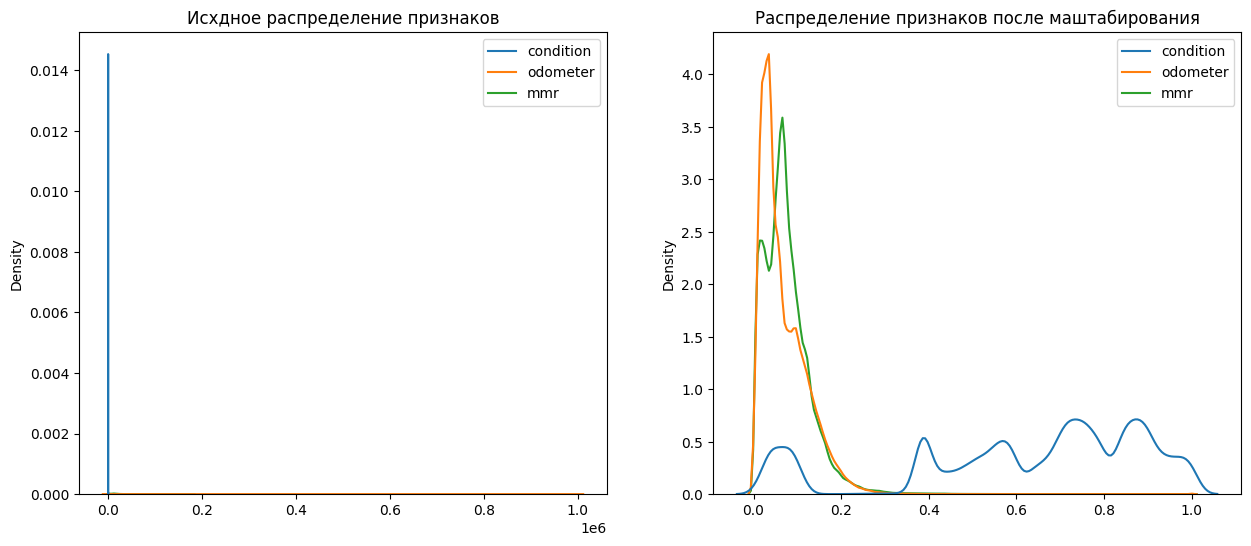

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
ax1.set_title("Исхдное распределение признаков")
sns.kdeplot(data=df_task_2[["condition", "odometer", "mmr"]], ax=ax1)
ax2.set_title("Распределение признаков после маштабирования")
sns.kdeplot(data=res[["condition", "odometer", "mmr"]], ax=ax2)
plt.show()

# Дополнительное задание

Построим парные графики для той же троице признаков: "condition", "odometer", "mmr".

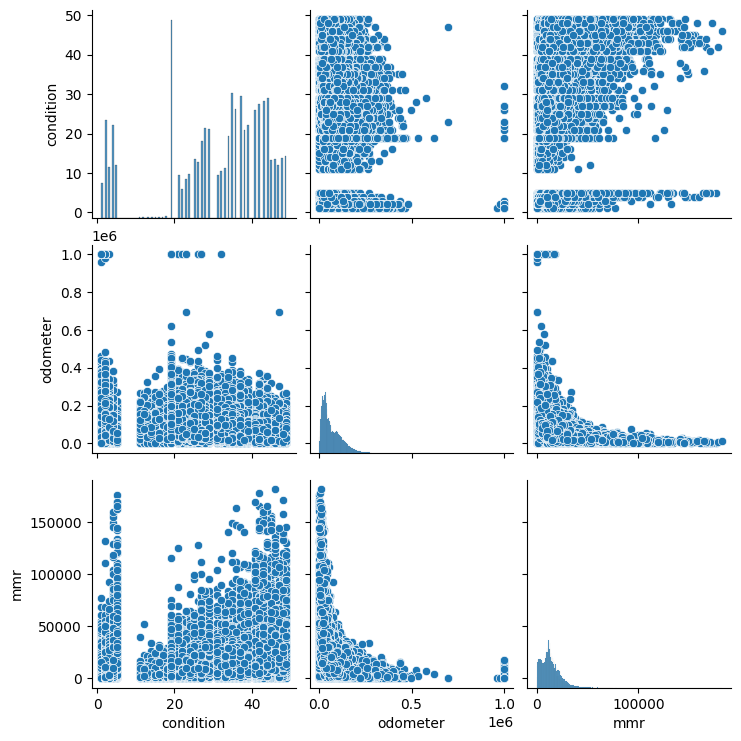

In [15]:
sns.pairplot(df_task_1[["condition", "odometer", "mmr"]])